# Aula 1 - Árvore de Cox, Ross e Rubinstein

### Exemplo 1) Suponha uma call de opção europeia em que o valor atual do ativo-objeto ($S0$) é de R\\$ 50.00. O preço de exercício (K) é de R\\$ 49,00, enquanto que a taxa de juros livre de risco ($r$) é de 6% ao ano. A volatilidade ($\sigma$) do ativo-objeto é de 30\% ao ano. O vencimento é em 3 meses. Qual o prêmio da opção?

In [62]:
#Importação e instalação de pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finoptions as fo
import warnings
warnings.filterwarnings('ignore')

### 1.a) Inicialmente, o exemplo será resolvido sem utilizar pacotes prontos:



In [58]:
# Criando a função Opt_CCR_Eur_Call
def Opt_CCR_Eur_Call(S0, K, T, r, N, vol):
    dT = T/N #Discretização do tempo
    u = np.exp(vol * np.sqrt(dT)) #Movimento para cima no preço do ativo objeto
    d = 1/u #Movimento para baixo no preço do ativo objeto
    q = (np.exp(r*dT) - d) / (u-d) #"probabilidade" neutra ao risco
    disc = np.exp(-r*dT)

    # Preço do ativo no vencimento (vetorizado)
    S_T = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # Valor da opção no vencimento (vetorizado)
    V = np.maximum(S_T - K , np.zeros(N+1) )

    # Valor da opção para  i < N
    for i in np.arange(N,0,-1):
        V = disc * ( q * V[1:i+1] + (1-q) * V[0:i])

    return V[0]

# Aplicando a função
S0 = 52.27
K = 52.28
T = 10/252
r = 0.0639
N = 5
vol = 0.292

Opt_CCR_Eur_Call(S0, K, T, r, N, vol)


1.3350159128081744

###1.b) Utilizando agora o pacote *finoptions*:

1.3350159128081744


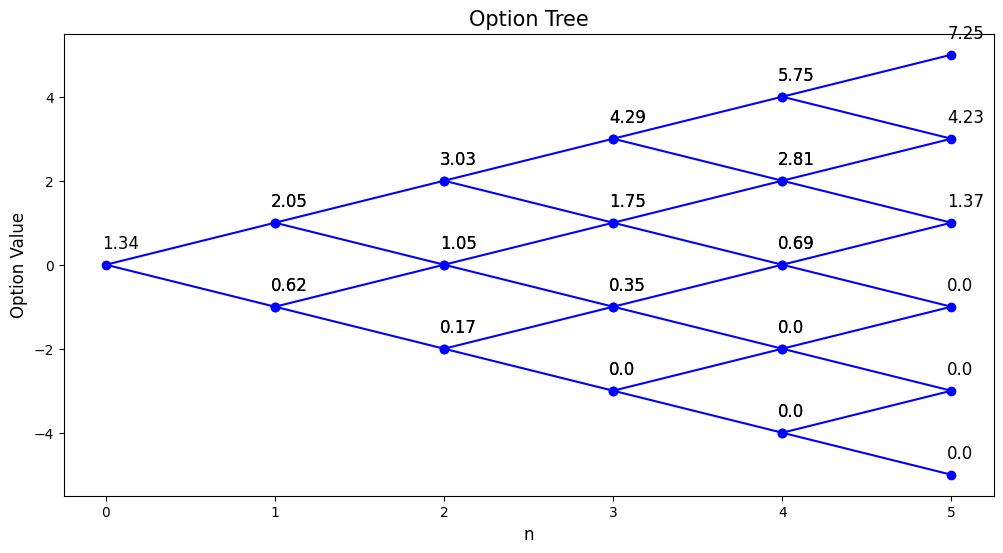

In [59]:
opt1_CRR = fo.binomial_tree_options.CRRBinomialTreeOption(S=S0,
                                                          K=K, t=T,
                                                          r=r, b=r,
                                                          sigma=vol,
                                                          n=5, type='european')

#b: taxa de custo de carregamento. Geralmente, simplesmente utilize a taxa livre de risco aqui.
print(opt1_CRR.call())

_ = opt1_CRR.plot(call=True, figsize=(12,6))

1.2126167041756115


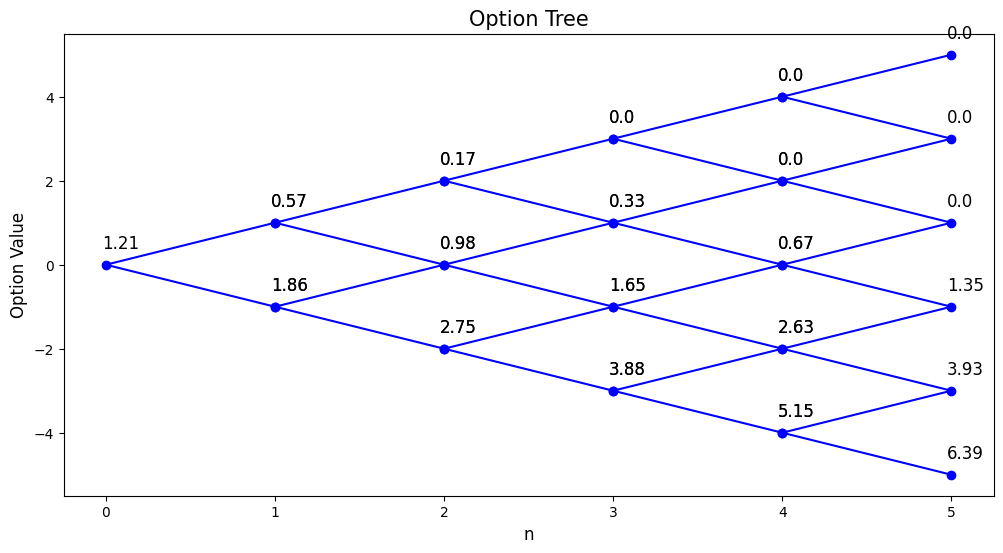

In [55]:
opt1_CRR = fo.binomial_tree_options.CRRBinomialTreeOption(S=S0,
                                                          K=K, t=T,
                                                          r=r, b=r,
                                                          sigma=vol,
                                                          n=5, type='european')
print(opt1_CRR.put())
_ = opt1_CRR.plot(call=False, figsize=(12,6))

### 1.c) Cálculo utilizando a equação de Black \& Scholes:

In [56]:
from scipy.stats import norm
N = norm.cdf

# Criando a função bs_call: Call Vanilla Europeia
def bs_call(S0, K, T, r, vol):
    d1 = (np.log(S0/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S0 * N(d1) - np.exp(-r * T) * K * N(d2)

# Criando a função bs_put: Put Vanilla Europeia
def bs_put(S0, K, T, r, vol):
    d1 = (np.log(S0/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return np.exp(-r * T) * N(-d2) * K - S0 * N(-d1)

print(f"Call Price: {bs_call(S0=S0, K=K, T=T, r=r, vol = vol)}")
print(f"Put Price: {bs_put(S0=S0, K=K, T=T, r=r, vol = vol)}")

Call Price: 1.273548418044598
Put Price: 1.15114920941204


In [57]:
# Usando função pronta:
opt1_BS = fo.BlackScholesOption(S = S0,
                                K = K,
                                t = T,
                                r = r,
                                b = r,
                                sigma = vol)
print(opt1_BS.call())
print(opt1_BS.put())

1.2735507695959463
1.1511515609633847


In [93]:
calls = []
puts = []


x_range = np.arange(5,20)
for i in x_range:
    option = fo.binomial_tree_options.CRRBinomialTreeOption(
                S=S0, K=K, t=T, r=r, b=r, sigma=vol, n=i, type='european')
    
    call_price = option.call()
    put_price = option.put()
    
    calls.append(call_price)
    puts.append(put_price)

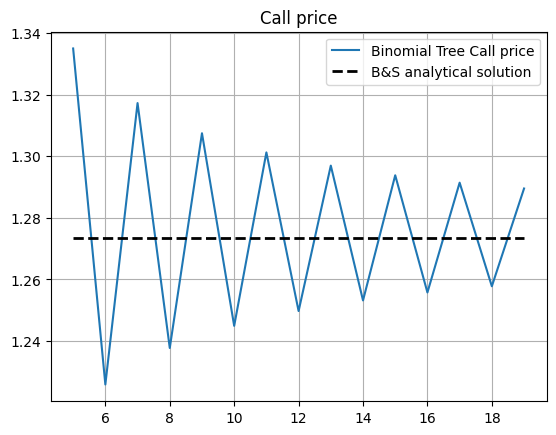

In [94]:
plt.plot(x_range, calls, label='Binomial Tree Call price')
plt.plot(x_range, [opt1_BS.call(),]*len(x_range), 'k--', lw=2, label='B&S analytical solution')
plt.title('Call price')
plt.legend()
plt.grid()

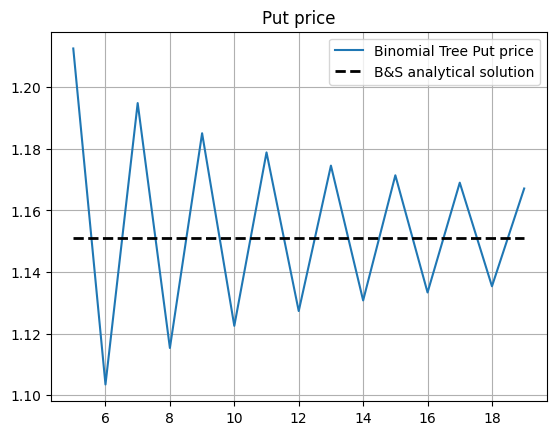

In [95]:
plt.plot(x_range, puts, label='Binomial Tree Put price')
plt.plot(x_range, [opt1_BS.put(),]*len(x_range), 'k--', lw=2, label='B&S analytical solution')
plt.title('Put price')
plt.legend()
plt.grid()
# plt.plot(np.arange(5,20), puts)